<a href="https://colab.research.google.com/github/crodriguezqu/Modelado-y-simulacion/blob/master/ArticuloModelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bifurcaciones, caos y crisis en el colapso de voltaje de un modelo de sistema de potencia

## Introducción

El voltaje de colapso a tomado mas importancia debido al aumento de demanda de potencia, lo que resulta en la operación de un sistema de potencia eléctrica cerca a sus limites de estabilidad. Dobson y Chiang presentaron un sistema de energía de ejemplo simple que contiene un generador, un bus infinito y una carga no lineal. 
Las bifurcaciones que se encontraron en este modelo incluyen: bifurcaciones de silla de montar, las bifurcaciones de Hopf del equilibrio nominal, una bifurcación de pliegue cíclico, bifurcaciones de duplicación de período, cascada de duplicación de período que conduce al caos. El tema principal de este artículo es determinar las implicaciones de estas bifurcaciones para el fenómeno de colapso de voltaje.


## Modelo de sistema de potencia

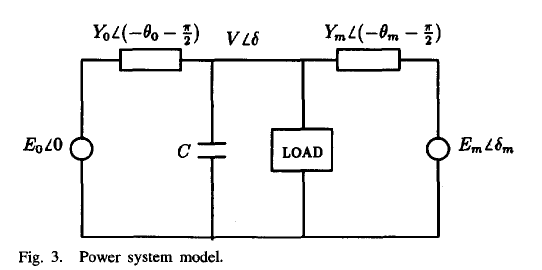

El sistema de energía que se considera en este artículo, que se muestra en la Figura 3, se basa en el ejemplo estudiado en Dobson y Chiang, pero con algunos valores de parámetros del sistema, diferentes. Dobson y Chiang mostraron que el punto de equilibrio nominal sufre una bifurcación del nodo silla cuando se varía el parámetro de carga de potencia reactiva Q1.

Para obtener las ecuaciones, primero se saca la ecuacion de oscilacion del generador:


image.png

Pe es es la energía eléctrica suministrada a la red:

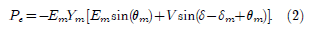

Potencia consumida por la carga:

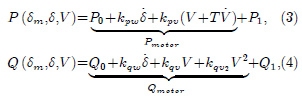

De (4):

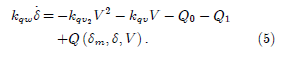

Sustituyendo (5) en (3) y resolviendo para V':

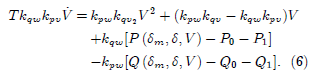

Reemplazando (2) en (1) y definiendo image.png:

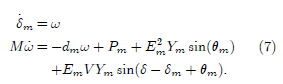

Las potencias activa y reactiva suministrada a la carga son:

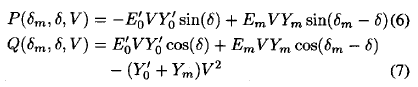

Finalmente queda un sistema de 4 ecuaciones de la siguiente forma:

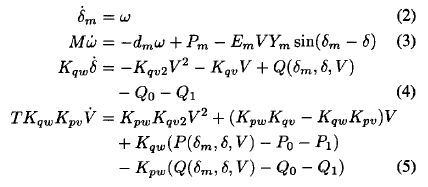

Los parametros utilizados son:

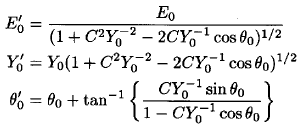

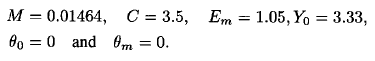
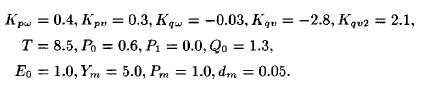

Gráfica de bifurcacion con parametros P1 = 0 y variando Q1:

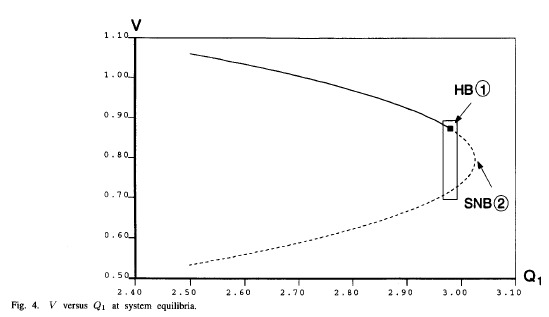

El analasis se realiza dentro del cuadro de la figura 4, donde despues de HB1 hay una bifurcacion de duplicacion de periodo:

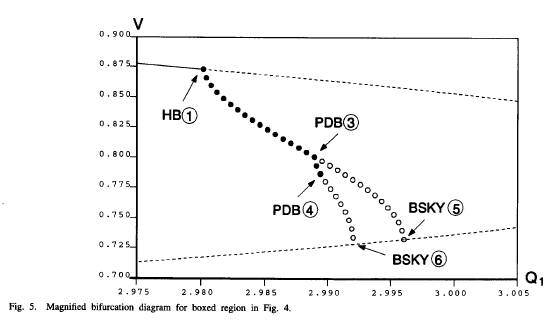

Donde las siglas de las bifurcaciones significan:
* HB: bifurcación de Hopf
* SNB: bifurcación del nodo de silla
* PDB: bifurcación de duplicación de período
* BSKY: bifurcación del cielo azul




Las condiciones iniciales utilizadas fueron las que se utilizaron en un articulo anterior:

image.png
image.png

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

In [ ]:
#Parametros
M=0.01464
C=3.5
Em=1.05
Y0=3.33
Theta_0=0
Theta_m=0

k_pw=0.4
k_pv=0.3
k_qw=-0.03
k_qv=-2.8
k_qv2=2.1

T=8.5
P0=0.6
Q0=1.3

E0=1
Ym=5
Pm=1
dm=0.05

E0_p=19.588235
Y0_p=0.17
Theta0_p=0

#Ecuaciones:
def P (Delta_m,Delta,V):
  return - E0_p*Y0_p*V*np.sin(Delta+Theta0_p) - Em*Ym*V*np.sin(Delta-Delta_m+Theta_m) + V**2*(Y0_p*np.sin(Theta0_p)+Ym*np.sin(Theta_m))

def Q (Delta_m,Delta,V):
  return E0_p*Y0_p*V*np.cos(Delta+Theta0_p) + Em*Ym*V*np.cos(Delta-Delta_m+Theta_m) - V**2*(Y0_p*np.cos(Theta0_p)+Ym*np.cos(Theta_m))

def sistema (t,y,P1,Q1):
  return [y[1] , (1/M)*(-dm*y[1] + Pm - Em*y[3]*Ym*np.sin(y[0]-y[2])) , (1/k_qw)*(-k_qv2*y[3]**2 - k_qv*y[3] + Q(y[0],y[2],y[3]) - Q0 - Q1) , (1/(T*k_qw*k_pv))*(k_pw*k_qv2*y[3]**2 + (k_pw*k_qv - k_qw*k_pv)*y[3] + k_qw*(P(y[0],y[2],y[3]) - P0 - P1) - k_pw*(Q(y[0],y[2],y[3]) - Q0 - Q1))]

## y = Delta_m , w , Delta , V

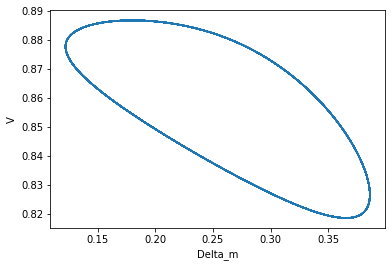

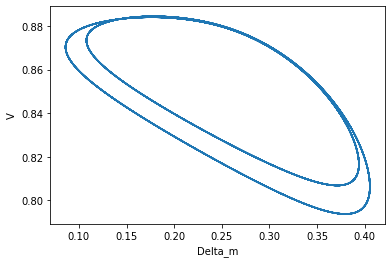

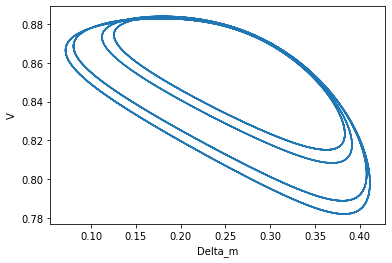

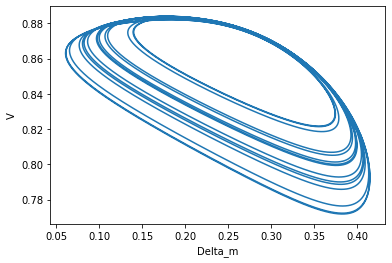

In [ ]:
def solucion (Q1):
  a,b=0,50
  t=np.linspace(a,b,100000)
  y0=[0.2, 0.001, 0.13899, 0.82]

  sol=solve_ivp(sistema,[a,b],y0,args=(0,Q1),t_eval=t,dense_output=True)

  return plt.plot(sol.y[0][-50000:-1],sol.y[3][-50000:-1])

for i in [2.98600,2.98910,2.98955,2.98975]:
  plt.figure()
  solucion(i)
  plt.xlabel('Delta_m')
  plt.ylabel('V')

time= 380.70868999999993


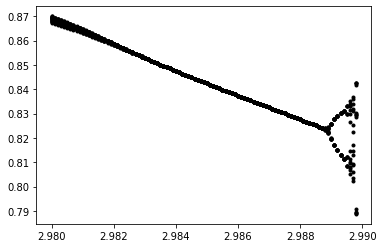

In [ ]:
def event_sistema (t,y,P1,Q1):
  return y[0]-0.25
# event_lorenz.terminal=True
event_sistema.direction=-1

a,b=0,50
t= np.linspace(a,b,100000)
y0=[0.2, 0.001, 0.13899, 0.82]
tic=time.clock()
for r in np.arange(2.98,3,0.0001):
  sol=solve_ivp(sistema,[a,b],y0,args=(0,r),t_eval=t,events=event_sistema,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>25:
      plt.plot(r,sol.y_events[0][i,3],".",color="black")

  #y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

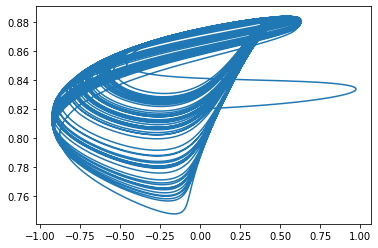

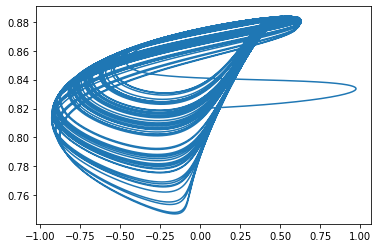

In [ ]:
def solucion (Q1):
  a,b=0,100
  t=np.linspace(a,b,100000)
  y0=[0.2, 0.001, 0.13899, 0.82]

  sol=solve_ivp(sistema,[a,b],y0,args=(0,Q1),t_eval=t,dense_output=True)

  return plt.plot(sol.y[1],sol.y[3])

for i in [2.9898257,2.9898258]:
  plt.figure()
  solucion(i)

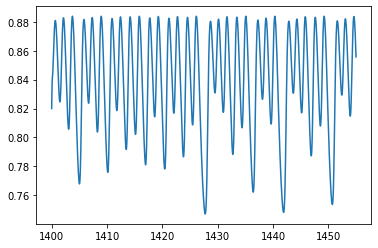

In [ ]:
def solucion (Q1):
  a,b=1400,1455
  t=np.linspace(a,b,10000)
  y0=[0.2, 0.001, 0.13899, 0.82]

  sol=solve_ivp(sistema,[a,b],y0,args=(0,Q1),t_eval=t,dense_output=True)

  return plt.plot(t,sol.y[3])

solucion(2.9898258)

## Conclusiones:
Se puede concluir que desde PDB3 es sistema empieza a tener multiples soluciones hasta entrar en caos y finalmente llegar unos valores para los parametros donde ocurre el colapso de voltaje.

## Articulo:
Hua O. Wang, Eyad H. Abed, Anan M. A. Hamdan, "Bifurcations, Chaos, and Crises in Voltage Collapse of a Model Power System", IEEE TRANSACTIONS ON CIRCUITS AND SYSTEMS-I FUNDAMENTAL THEORY AND APPLICATIONS, VOL. 41, NO. 3, MARCH 1994.

## Articulo anterior y valores iniciales:
E.H. Abed, J.C. Alexander, H. Wang, A.M.A. Hamdan, H.-C. Lee, "Dynamic Bifurcations in a Power System Model Exhibiting Voltage Collapse"